In [1]:
# Submarine melting Qsm under different subglacial discharges Qsg and sill depths
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Obtain submarine melting Qsm
def IFA_deep(datapath, case_id):
    # Grid areas
    Area = np.empty([90, 10])
    Area[:20,:] = 400
    Area[20:50,:] = 800
    Area[50:,:] = 1200
    file0 = xr.open_dataset(datapath+'/icefrntA_' + str(format(case_id,'03d')) + '.nc')
    file = file0.isel(T=~file0.get_index("T").duplicated()) 
    t0 = 0
    #t0 = 89
    tn = len(file.T)
    state = file.isel(Y=range(35,45), T=range(t0,tn))
    MR = state.icefrntA.isel(X=1).data.mean(0) # Melt rate at the icefront
    Qsm = (MR*Area).sum()/(24*3600)
    return Qsm

def IFA_shallow(datapath, case_id):
    # Grid areas
    Area = np.empty([90, 10])
    Area[:20,:] = 200
    Area[20:50,:] = 400
    Area[50:,:] = 600
    file0 = xr.open_dataset(datapath+'/icefrntA_' + str(format(case_id,'03d')) + '.nc')
    file = file0.isel(T=~file0.get_index("T").duplicated()) 
    t0 = 0
    #t0 = 89
    tn = len(file.T)
    state = file.isel(Y=range(35,45), T=range(t0,tn))
    MR = state.icefrntA.isel(X=1).data.mean(0) # Melt rate at the icefront
    Qsm = (MR*Area).sum()/(24*3600)
    return Qsm

In [3]:
# Fjord depth h=400m
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/2_Qsg_nosill' # hs/h=1
path2 = '/work/oceans/wbao/MITgcm_results/iceplume/2_Qsg_maxhs' # hs/h=0.12
path3 = '/work/oceans/wbao/MITgcm_results/iceplume/2_Qsg_minhs' # # hs/h=0.04

# Fjord depth h=200m
path4 = '/work/oceans/wbao/MITgcm_results/iceplume/shallow_fjord01' # hs/h=0.04
path5 = '/work/oceans/wbao/MITgcm_results/iceplume/shallow_fjord02' # hs/h=0.08
path6 = '/work/oceans/wbao/MITgcm_results/iceplume/shallow_fjord03' # hs/h=0.12
path7 = '/work/oceans/wbao/MITgcm_results/iceplume/shallow_fjord04' # hs/h=0.24
path8 = '/work/oceans/wbao/MITgcm_results/iceplume/shallow_fjord05' # hs/h=1


Qsg = np.array([25,50,100,250,500,1000])

case = np.array([1,2,3,4,5,6])

Qsm1 = np.empty(len(case))
Qsm2 = np.empty(len(case))
Qsm3 = np.empty(len(case))
Qsm4 = np.empty(len(case))
Qsm5 = np.empty(len(case))
Qsm6 = np.empty(len(case))
Qsm7 = np.empty(len(case))
Qsm8 = np.empty(len(case))

for i in range(len(case)):
    Qsm1[i] = IFA_deep(path1,case[i])
    Qsm2[i] = IFA_deep(path2,case[i])
    Qsm3[i] = IFA_deep(path3,case[i])
    Qsm4[i] = IFA_shallow(path4,case[i])
    Qsm5[i] = IFA_shallow(path5,case[i])
    Qsm6[i] = IFA_shallow(path6,case[i])
    Qsm7[i] = IFA_shallow(path7,case[i])
    Qsm8[i] = IFA_shallow(path8,case[i])

In [ ]:
Qsm4, Qsm5, Qsm6, Qsm7

In [ ]:
file1 = xr.open_dataset(path4+'/state_001.nc')
u1 = file1.U.data.mean(axis=(0,2))

file2 = xr.open_dataset(path5+'/state_001.nc')
u2 = file2.U.data.mean(axis=(0,2))


file3 = xr.open_dataset(path6+'/state_001.nc')
u3 = file3.U.data.mean(axis=(0,2))

In [ ]:
u1[:,178], u2[:,178], u3[:,178]

Text(0.0, 1.0, '(b) Same $h_s$')

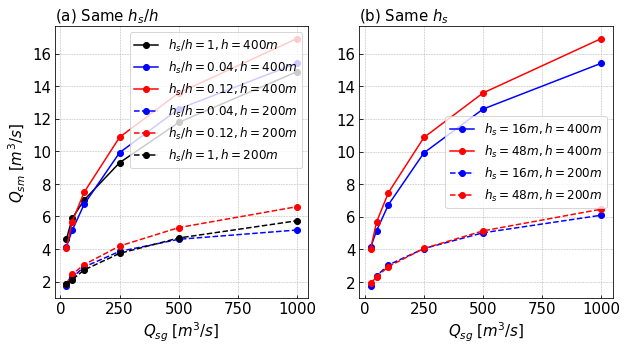

In [5]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

qsg = np.arange(0,1050,50)
#ax.plot(qsg,qsg**(2/5), 'k-',lw=3,alpha=.5,label=r'$Q^{2/5}_{sg}$')
ax1.plot(Qsg,Qsm1,'o-k',ms=6, lw=1.5,label=r'$h_s/h=1,h=400m$')
ax1.plot(Qsg,Qsm3,'o-b',ms=6, lw=1.5,label=r'$h_s/h=0.04,h=400m$')
ax1.plot(Qsg,Qsm2,'o-r',ms=6, lw=1.5,label=r'$h_s/h=0.12,h=400m$')
ax1.plot(Qsg,Qsm4,'o--b',ms=6, lw=1.5,label=r'$h_s/h=0.04,h=200m$')
ax1.plot(Qsg,Qsm6,'o--r',ms=6, lw=1.5,label=r'$h_s/h=0.12,h=200m$')
ax1.plot(Qsg,Qsm8,'o--k',ms=6, lw=1.5,label=r'$h_s/h=1,h=200m$')

ax1.legend(loc='best', fontsize=12)
ax1.set_xlabel(r'$Q_{sg}\;[m^3/s]$',size = 15)
ax1.set_ylabel(r'$Q_{sm}\;[m^3/s]$',size = 15)
ax1.grid(linestyle='--', linewidth=0.5)
ax1.tick_params(direction='in', labelsize=15)
ax1.set_title(r'(a) Same $h_s/h$', loc='left', size=15)


ax2.plot(Qsg,Qsm3,'o-b',ms=6, lw=1.5,label=r'$h_s=16m,h=400m$')
ax2.plot(Qsg,Qsm2,'o-r',ms=6, lw=1.5,label=r'$h_s=48m,h=400m$')
ax2.plot(Qsg,Qsm5,'o--b',ms=6, lw=1.5,label=r'$h_s=16m,h=200m$')
ax2.plot(Qsg,Qsm7,'o--r',ms=6, lw=1.5,label=r'$h_s=48m,h=200m$')
ax2.legend(loc='best', fontsize=12)
ax2.set_xlabel(r'$Q_{sg}\;[m^3/s]$',size = 15)
#ax2.set_ylabel(r'$Q_{sm}\;[m^3/s]$',size = 15)
ax2.grid(linestyle='--', linewidth=0.5)
ax2.tick_params(direction='in', labelsize=15)
ax2.set_title(r'(b) Same $h_s$', loc='left', size=15)

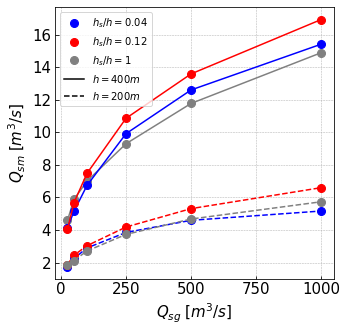

In [5]:
fig2 = plt.figure(figsize=(5,5))
fig2.tight_layout()
ax1 = fig2.add_subplot(111)


ax1.plot(Qsg,Qsm1,'o-',color='gray',ms=8, lw=1.5,label=r'$h_s/h=1,h=400m$')
ax1.plot(Qsg,Qsm3,'o-b',ms=8, lw=1.5,label=r'$h_s/h=0.04,h=400m$')
ax1.plot(Qsg,Qsm2,'o-r',ms=8, lw=1.5,label=r'$h_s/h=0.12,h=400m$')
ax1.plot(Qsg,Qsm4,'o--b',ms=8, lw=1.5,label=r'$h_s/h=0.04,h=200m$')
ax1.plot(Qsg,Qsm6,'o--r',ms=8, lw=1.5,label=r'$h_s/h=0.12,h=200m$')
ax1.plot(Qsg,Qsm8,'o--',color='gray',ms=8, lw=1.5,label=r'$h_s/h=1,h=200m$')


line1 = plt.Line2D((0,1),(0,0), color='k', lw=1.5, linestyle='-')
line2 = plt.Line2D((0,1),(0,0), color='k', lw=1.5, linestyle='--')
marker1 = plt.Line2D((0,1),(0,0), color='b', marker='o', ms=8,linestyle='')
marker2 = plt.Line2D((0,1),(0,0), color='r', marker='o', ms=8,linestyle='')
marker3 = plt.Line2D((0,1),(0,0), color='gray', marker='o', ms=8,linestyle='')
ax1.legend([marker1,marker2,marker3,line1,line2,],[r'$h_s/h=0.04$',r'$h_s/h=0.12$',r'$h_s/h=1$',
                                                   r'$h=400m$', r'$h=200m$'],loc='best', fontsize=10)
ax1.set_xticks([0, 250, 500, 750, 1000])              
ax1.set_xlabel(r'$Q_{sg}\;[m^3/s]$',size = 15)
ax1.set_ylabel(r'$Q_{sm}\;[m^3/s]$',size = 15)
ax1.grid(linestyle='--', linewidth=0.5)
ax1.tick_params(direction='in', labelsize=15)
#ax1.set_title(r'(a) Same $h_s/h$', loc='left', size=15)

In [6]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
#fig1.savefig(fig_path + '/6-QsgCase.png', dpi=200, bbox_inches='tight') 
fig2.savefig(fig_path + '/Qsg-Qsm.png', dpi=300, bbox_inches='tight') 